In [1]:
#import the required libraries here
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from matplotlib.ticker import FuncFormatter

import pyfolio as pf

%matplotlib inline

c:\users\jiaxi\appdata\local\programs\python\python38\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
tickers = ['FSLY','IMMR', 'FB', 'U','NVDA','AAPL', 'MSFT',"METV"]

start_date = '2021-07-01'
end_date = '2022-03-01'

panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
panel_data = panel_data.loc['2021-01-01' : '2021-12-31']
data = panel_data[['Close', 'Adj Close']]
data.head()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-06-30  59.599998  8.77  347.709991  109.830002  200.024994  136.960007   
2021-07-01  58.020000  8.49  354.390015  105.839996  202.119995  137.270004   
2021-07-02  56.470001  8.46  354.700012  106.089996  204.869995  139.960007   
2021-07-06  56.860001  8.22  352.779999  106.650002  206.985001  142.020004   
2021-07-07  54.369999  8.23  350.489990  104.489998  203.717499  144.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-06-30  270.899994  15.12  59.599998  8.77  347.709991  109.830002   
2021-07-01  271.600006  14.89  58.020000  8.49  354.390015  105.839996   
2021-07-02  277.649994  15.00  56.470001  8.46  354.700012  106.089996   
2021-07-06  277.660004  15.01  56.860001  8.22  352.779999  106.650002   
2021-07-07  279.929993  14.89  54.369999  8.23  350.489990  104.489998   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-06-30  199.931183  136.382065  269.331696  15.12  
2021-07-01  202.025208  136.690735  270.027679  14.89  
2021-07-02  204.773911  139.369400  276.042633  15.00  
2021-07-06  206.887924  141.420700  276.052582  15.01  
2021-07-07  203.621964  143.959946  278.309418  14.89

In [3]:
data.tail()

Attributes      Close                                                        \
Symbols          FSLY  IMMR          FB           U        NVDA        AAPL   
Date                                                                          
2021-12-27  37.750000  6.05  346.179993  148.009995  309.450012  180.330002   
2021-12-28  36.259998  5.87  346.220001  143.520004  303.220001  179.289993   
2021-12-29  35.090000  5.80  342.940002  144.550003  300.010010  179.380005   
2021-12-30  37.230000  5.85  344.359985  145.919998  295.859985  178.199997   
2021-12-31  35.450001  5.71  336.350006  142.990005  294.109985  177.570007   

Attributes                     Adj Close                                \
Symbols           MSFT   METV       FSLY  IMMR          FB           U   
Date                                                                     
2021-12-27  342.450012  15.60  37.750000  6.05  346.179993  148.009995   
2021-12-28  341.250000  15.37  36.259998  5.87  346.220001  143.520004   
2021-12-29  341.950012  15.25  35.090000  5.80  342.940002  144.550003   
2021-12-30  339.320007  15.31  37.230000  5.85  344.359985  145.919998   
2021-12-31  336.320007  15.18  35.450001  5.71  336.350006  142.990005   

Attributes                                             
Symbols           NVDA        AAPL        MSFT   METV  
Date                                                   
2021-12-27  309.397308  180.100540  341.743378  15.60  
2021-12-28  303.168335  179.061859  340.545837  15.37  
2021-12-29  299.958893  179.151749  341.244415  15.25  
2021-12-30  295.809601  177.973251  338.619843  15.31  
2021-12-31  294.059875  177.344055  335.626038  15.18

In [4]:
close_data = panel_data['Close']
adj_close_data = panel_data['Adj Close']

In [5]:
## Check for null values 
close_data.isnull().sum()
adj_close_data.isnull().sum()

Symbols
FSLY    0
IMMR    0
FB      0
U       0
NVDA    0
AAPL    0
MSFT    0
METV    0
dtype: int64

In [6]:
close_data.count()

Symbols
FSLY    129
IMMR    129
FB      129
U       129
NVDA    129
AAPL    129
MSFT    129
METV    129
dtype: int64

In [7]:
### Calculate the adj close returned series
return_series_adj = (adj_close_data.pct_change()+ 1).cumprod() - 1
return_series_adj.tail(1)*100

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-40.520131,-34.891679,-3.267086,30.192118,47.080546,30.034734,24.614386,0.396828


<AxesSubplot:xlabel='Date'>

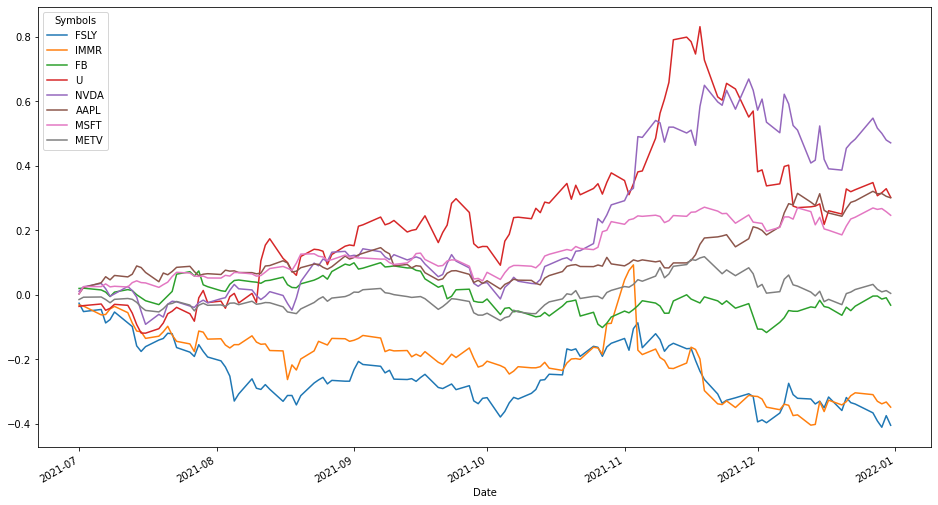

In [8]:
return_series_adj.plot(figsize=(16,9))

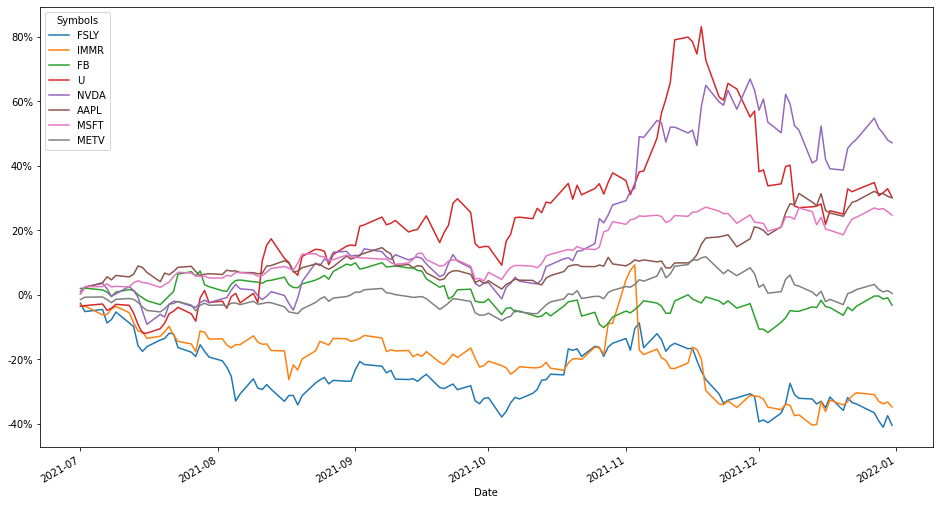

In [9]:
ax1 = return_series_adj.plot(figsize=(16,9))
#This sets the axis to percentage scale
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [10]:
### Check for annualised return 
annualized_return = (1+return_series_adj.tail(1))**(1/(1/2))-1
annualized_return

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-12-31,-0.646215,-0.576091,-0.064274,0.694999,1.163269,0.690903,0.552875,0.007952


<AxesSubplot:xlabel='Date'>

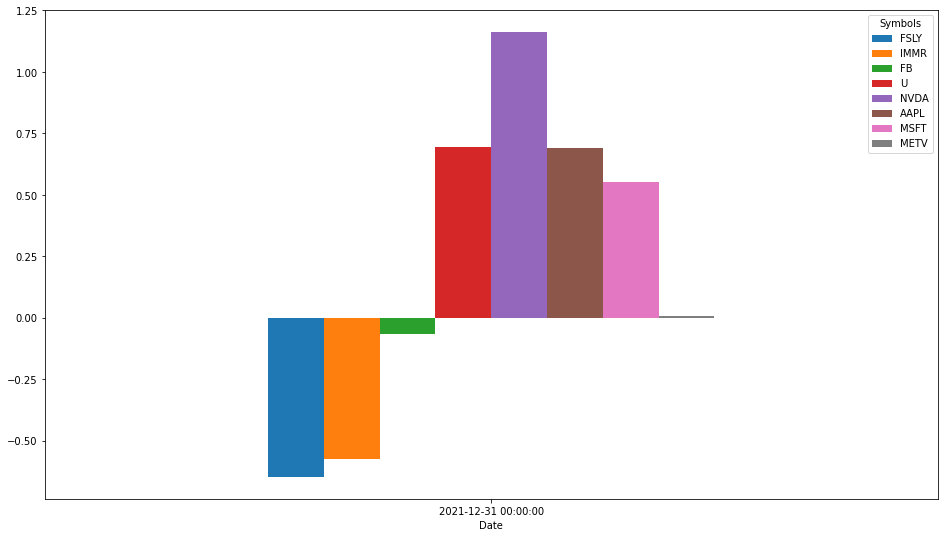

In [11]:
annualized_return.plot.bar(rot=0, figsize=(16,9))

C:\Users\jiaxi\AppData\Local\Temp/ipykernel_18104/863718015.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -0.75, '-75.00%'),
 Text(0, -0.5, '-50.00%'),
 Text(0, -0.25, '-25.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.25, '25.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.75, '75.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 1.25, '125.00%'),
 Text(0, 1.5, '150.00%')]

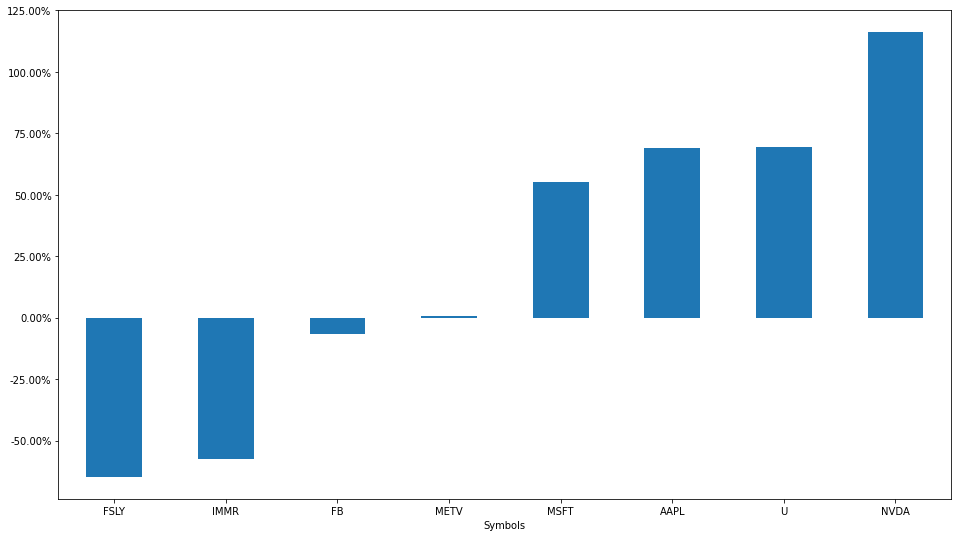

In [12]:
annualized_return = annualized_return.squeeze()
# annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = annualized_return.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))
type(ax)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [13]:
### Find Corr between these stocks
return_series_close = (close_data.pct_change()+ 1).cumprod() - 1
# return_series_close.plot(figsize=(16,9))
return_series_close.corr()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Symbols,,,,,,,,
FSLY,1.000000,0.758933,0.149105,-0.197366,-0.298011,-0.504765,-0.298211,0.109466
IMMR,0.758933,1.000000,0.373492,-0.442718,-0.605199,-0.706019,-0.552908,-0.222922
FB,0.149105,0.373492,1.000000,-0.422991,-0.486578,-0.259623,-0.459541,-0.182229
U,-0.197366,-0.442718,-0.422991,1.000000,0.823507,0.388195,0.838717,0.822390
NVDA,-0.298011,-0.605199,-0.486578,0.823507,1.000000,0.751314,0.945436,0.830791
AAPL,-0.504765,-0.706019,-0.259623,0.388195,0.751314,1.000000,0.742984,0.456147
MSFT,-0.298211,-0.552908,-0.459541,0.838717,0.945436,0.742984,1.000000,0.790530
METV,0.109466,-0.222922,-0.182229,0.822390,0.830791,0.456147,0.790530,1.000000


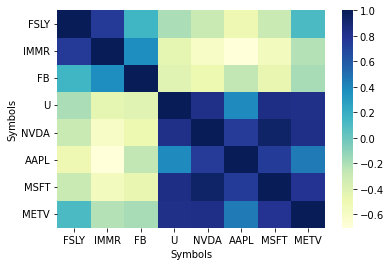

In [14]:
import seaborn as sns
dataplot = sns.heatmap(return_series_close.corr(), cmap="YlGnBu")

In [15]:
### Volatility
ahv = np.sqrt(np.log(close_data / close_data.shift(1)).var()) * np.sqrt(252)
ahv

Symbols
FSLY    0.603225
IMMR    0.670091
FB      0.285605
U       0.557605
NVDA    0.460791
AAPL    0.223441
MSFT    0.198213
METV    0.225692
dtype: float64

C:\Users\jiaxi\AppData\Local\Temp/ipykernel_18104/3817654803.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, 0.0, '0.00%'),
 Text(0, 0.1, '10.00%'),
 Text(0, 0.2, '20.00%'),
 Text(0, 0.30000000000000004, '30.00%'),
 Text(0, 0.4, '40.00%'),
 Text(0, 0.5, '50.00%'),
 Text(0, 0.6000000000000001, '60.00%'),
 Text(0, 0.7000000000000001, '70.00%'),
 Text(0, 0.8, '80.00%')]

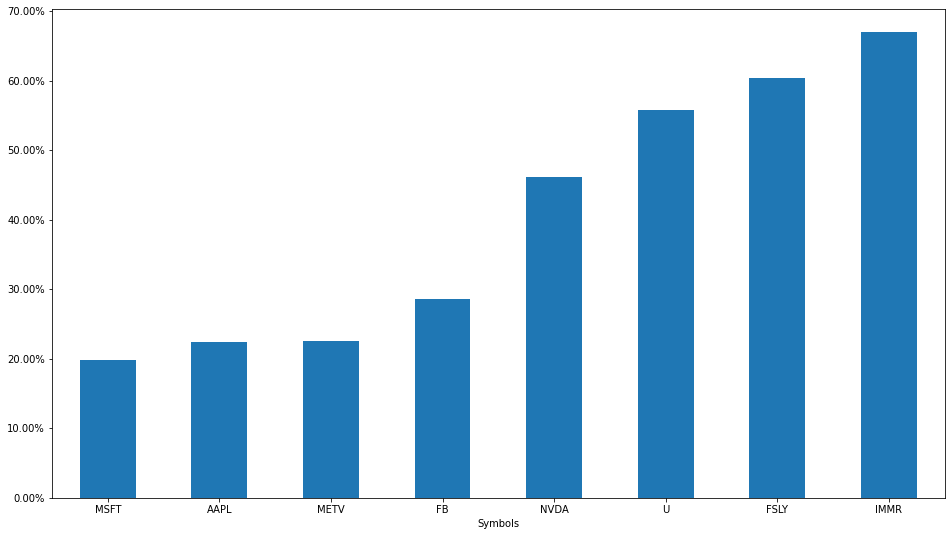

In [16]:
# ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))

ax = ahv.sort_values(ascending=True).plot.bar(rot=0, figsize=(16,9))


# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

In [17]:
risk_free_ann_ret_rate = 0.01

returns_ts = adj_close_data.pct_change().dropna()
avg_daily_ret = returns_ts.mean()

returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252
avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

#Add the excess return columns for each ETF
returns_ts['Excess_ret_FSLY'] = returns_ts["FSLY"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_IMMR'] = returns_ts["IMMR"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_FB'] = returns_ts["FB"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_U'] = returns_ts["U"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_NVDA'] = returns_ts["NVDA"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_AAPL'] = returns_ts["AAPL"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_MSFT'] = returns_ts["MSFT"] - returns_ts['RiskFree_Rate']
returns_ts['Excess_ret_METV'] = returns_ts["METV"] - returns_ts['RiskFree_Rate']

In [18]:
#calculate sharpe ratio

sharpe_FSLY = ((avg_daily_ret['FSLY'] - avg_rf_ret) /returns_ts['Excess_ret_FSLY'].std())*np.sqrt(252)
print("Sharpe Ratio FSLY :\n", sharpe_FSLY.round(2))
sharpe_IMMR = ((avg_daily_ret['IMMR'] - avg_rf_ret) /returns_ts['Excess_ret_IMMR'].std())*np.sqrt(252)
print("Sharpe Ratio IMMR :\n" , sharpe_IMMR.round(2))
sharpe_FB = ((avg_daily_ret['FB'] - avg_rf_ret) /returns_ts['Excess_ret_FB'].std())*np.sqrt(252)
print("Sharpe Ratio FB :\n" , sharpe_FB.round(2))
sharpe_U = ((avg_daily_ret['U'] - avg_rf_ret) /returns_ts['Excess_ret_U'].std())*np.sqrt(252)
print("Sharpe Ratio U :\n", sharpe_U.round(2))
sharpe_NVDA = ((avg_daily_ret['NVDA'] - avg_rf_ret) /returns_ts['Excess_ret_NVDA'].std())*np.sqrt(252)
print("Sharpe Ratio NVDA :\n" , sharpe_NVDA.round(2))
sharpe_AAPL = ((avg_daily_ret['AAPL'] - avg_rf_ret) /returns_ts['Excess_ret_AAPL'].std())*np.sqrt(252)
print("Sharpe Ratio AAPL :\n" , sharpe_AAPL.round(2))
sharpe_MSFT = ((avg_daily_ret['MSFT'] - avg_rf_ret) /returns_ts['Excess_ret_MSFT'].std())*np.sqrt(252)
print("Sharpe Ratio MSFT :\n" , sharpe_MSFT.round(2))

sharpe_METV = ((avg_daily_ret['METV'] - avg_rf_ret) /returns_ts['Excess_ret_METV'].std())*np.sqrt(252)
print("Sharpe Ratio METV :\n" , sharpe_METV.round(2))

Sharpe Ratio FSLY :
 -1.42
Sharpe Ratio IMMR :
 -0.98
Sharpe Ratio FB :
 -0.12
Sharpe Ratio U :
 1.19
Sharpe Ratio NVDA :
 1.84
Sharpe Ratio AAPL :
 2.38
Sharpe Ratio MSFT :
 2.23
Sharpe Ratio METV :
 0.1


In [19]:
flattened_data = pd.read_csv('flattened_data.csv')

In [21]:
#Install panda profiling 
'''
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
'''

'\nimport sys\n!{sys.executable} -m pip install -U pandas-profiling[notebook]\n!jupyter nbextension enable --py widgetsnbextension\n'

In [22]:
from pandas_profiling import ProfileReport
prof = ProfileReport(flattened_data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
#Write to csv 
adj_close_data.to_csv("Adj_close.csv", sep=',', encoding='utf-8')

In [24]:
adj_close_prof = ProfileReport(adj_close_data)
adj_close_prof.to_file(output_file='Adj_close_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
import copy
TechIndicator = copy.deepcopy(data)

In [26]:
def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [27]:
RSI=TechIndicator["Close"]
tech_list=RSI.columns.to_list()
tech_list

['FSLY', 'IMMR', 'FB', 'U', 'NVDA', 'AAPL', 'MSFT', 'METV']

In [28]:
RSI

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89
...,...,...,...,...,...,...,...,...
2021-12-27,37.750000,6.05,346.179993,148.009995,309.450012,180.330002,342.450012,15.60
2021-12-28,36.259998,5.87,346.220001,143.520004,303.220001,179.289993,341.250000,15.37
2021-12-29,35.090000,5.80,342.940002,144.550003,300.010010,179.380005,341.950012,15.25


In [29]:
for stock in tech_list:
    momentum_1D=stock+"|Momentum_1D"
    RSI_14D=stock+"|RSI_14D"
    RSI[momentum_1D] = (RSI[stock]-RSI[stock].shift(1)).fillna(0)
    RSI[RSI_14D] = RSI[momentum_1D].rolling(center=False, window=14).apply(rsi).fillna(0)

C:\Users\jiaxi\AppData\Local\Temp/ipykernel_18104/3767238250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI[momentum_1D] = (RSI[stock]-RSI[stock].shift(1)).fillna(0)
C:\Users\jiaxi\AppData\Local\Temp/ipykernel_18104/3767238250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RSI[RSI_14D] = RSI[momentum_1D].rolling(center=False, window=14).apply(rsi).fillna(0)


In [30]:
RSI.iloc[13,:]

Symbols
FSLY                 51.500000
IMMR                  7.760000
FB                  341.660004
U                   100.160004
NVDA                186.119995
AAPL                146.149994
MSFT                279.320007
METV                 14.460000
FSLY|Momentum_1D      0.290001
FSLY|RSI_14D         30.297856
IMMR|Momentum_1D      0.120000
IMMR|RSI_14D         31.599220
FB|Momentum_1D        4.709991
FB|RSI_14D           54.889654
U|Momentum_1D         1.930000
U|RSI_14D            31.518035
NVDA|Momentum_1D     -1.677505
NVDA|RSI_14D         40.380385
AAPL|Momentum_1D      3.699997
AAPL|RSI_14D         56.327777
MSFT|Momentum_1D      2.309998
MSFT|RSI_14D         55.253151
METV|Momentum_1D      0.150000
METV|RSI_14D         39.957475
Name: 2021-07-20 00:00:00, dtype: float64

In [31]:
#Sentiment Analysis
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [32]:
news_tables = {}

for ticker in tech_list:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [33]:
news_tables

{'FSLY': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Mar-23-22 06:15PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/fastly-fsly-stock-moves-0-221510051.html" target="_blank">Fastly (FSLY) Stock Moves -0.98%: What You Should Know</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Zacks</span></div></div></td></tr>
 <tr><td align="right" width="130">02:23PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/fastly-only-vendor-named-gartner-182300666.html" target="_blank">Fastly Only Vendor Named Gartner Peer Insights Customers Choice for Web Application and API Protection for Four Consecutive Years</a></div><div class="news-link-right"><span 

In [34]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['FSLY',
  'Mar-23-22',
  '06:15PM',
  'Fastly (FSLY) Stock Moves -0.98%: What You Should Know'],
 ['FSLY',
  'Mar-23-22',
  '02:23PM',
  'Fastly Only Vendor Named Gartner Peer Insights Customers Choice for Web Application and API Protection for Four Consecutive Years'],
 ['FSLY',
  'Mar-22-22',
  '08:01AM',
  'Cloudflare Doesnt Offer Investors Security at This Price'],
 ['FSLY',
  'Mar-21-22',
  '10:58AM',
  "Will Adobe's (ADBE) Q1 Earnings Gain From Digital Media?"],
 ['FSLY',
  'Mar-21-22',
  '05:06AM',
  "10 Stocks I've Bought During the Market Sell-Off"],
 ['FSLY',
  'Mar-20-22',
  '05:06AM',
  '3 Tech Stocks That Can Turn $200,000 Into $1 Million in 8 Years (or Less)'],
 ['FSLY',
  'Mar-17-22',
  '09:00AM',
  'Fastly Named a Leader in IDC MarketScape for Worldwide Commercial CDN 2022 Vendor Assessment'],
 ['FSLY',
  'Mar-14-22',
  '05:06AM',
  '2 Metaverse Stocks to Buy Hand Over Fist and 1 to Avoid Like the Plague'],
 ['FSLY',
  'Mar-12-22',
  '07:00AM',
  'Zendesk Could 10X Cu

In [35]:
parsed_news[0]

['FSLY',
 'Mar-23-22',
 '06:15PM',
 'Fastly (FSLY) Stock Moves -0.98%: What You Should Know']

In [36]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jiaxi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,FSLY,2022-03-23,06:15PM,Fastly (FSLY) Stock Moves -0.98%: What You Sho...,0.000,1.000,0.000,0.0000
1,FSLY,2022-03-23,02:23PM,Fastly Only Vendor Named Gartner Peer Insights...,0.000,1.000,0.000,0.0000
2,FSLY,2022-03-22,08:01AM,Cloudflare Doesnt Offer Investors Security at ...,0.225,0.775,0.000,-0.2584
3,FSLY,2022-03-21,10:58AM,Will Adobe's (ADBE) Q1 Earnings Gain From Digi...,0.000,0.702,0.298,0.5267
4,FSLY,2022-03-21,05:06AM,10 Stocks I've Bought During the Market Sell-Off,0.000,1.000,0.000,0.0000


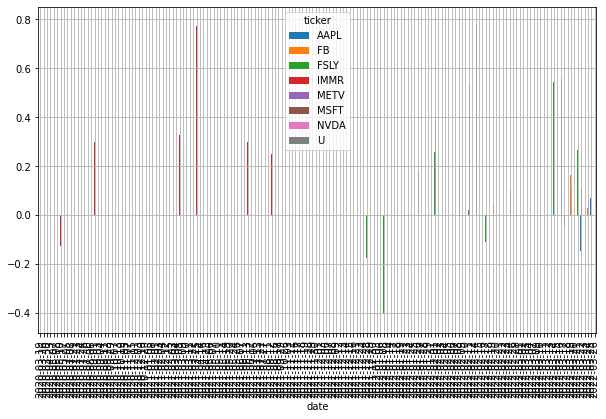

In [38]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [39]:
FSLY_sentiment=parsed_and_scored_news[parsed_and_scored_news["ticker"]=="FSLY"]
FSLY_sentiment

,ticker,date,time,headline,neg,neu,pos,compound
0,FSLY,2022-03-23,06:15PM,Fastly (FSLY) Stock Moves -0.98%: What You Sho...,0.000,1.000,0.000,0.0000
1,FSLY,2022-03-23,02:23PM,Fastly Only Vendor Named Gartner Peer Insights...,0.000,1.000,0.000,0.0000
2,FSLY,2022-03-22,08:01AM,Cloudflare Doesnt Offer Investors Security at ...,0.225,0.775,0.000,-0.2584
3,FSLY,2022-03-21,10:58AM,Will Adobe's (ADBE) Q1 Earnings Gain From Digi...,0.000,0.702,0.298,0.5267
4,FSLY,2022-03-21,05:06AM,10 Stocks I've Bought During the Market Sell-Off,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
95,FSLY,2021-11-29,05:05PM,Why Fastly Stock Rose Higher on Monday,0.000,1.000,0.000,0.0000
96,FSLY,2021-11-29,09:00AM,Fastly Names Lakshmi Sharma as New Chief Produ...,0.000,1.000,0.000,0.0000
97,FSLY,2021-11-19,09:47AM,10 New Stock Picks of Billionaire Stanley Druc...,0.000,1.000,0.000,0.0000
98,FSLY,2021-11-18,07:09AM,"When Should You Buy Fastly, Inc. (NYSE:FSLY)?",0.000,1.000,0.000,0.0000


<AxesSubplot:xlabel='date'>

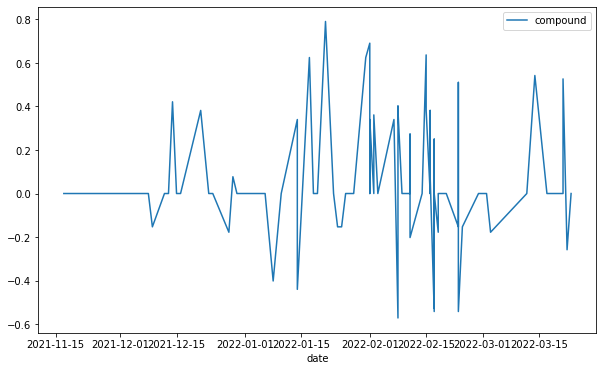

In [40]:
FSLY_sentiment.plot(x="date",y="compound")

# Calculation MACD 

In [41]:
TechIndicator = copy.deepcopy(data)

In [42]:
MACD=TechIndicator["Close"]
MACD

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89
...,...,...,...,...,...,...,...,...
2021-12-27,37.750000,6.05,346.179993,148.009995,309.450012,180.330002,342.450012,15.60
2021-12-28,36.259998,5.87,346.220001,143.520004,303.220001,179.289993,341.250000,15.37
2021-12-29,35.090000,5.80,342.940002,144.550003,300.010010,179.380005,341.950012,15.25


In [43]:
def calculate_MACD(stock):
    df=MACD[stock].to_frame()
    df["long_term_EMA"]=df[stock].ewm(span=26,adjust=False).mean() #long term EMA 
    df["short_term_EMA"]=df[stock].ewm(span=12,adjust=False).mean() #short term EMA 
    df["MACD"]=df["short_term_EMA"]-df["long_term_EMA"]           #MACD line
    df["Signal_line"]=df["MACD"].ewm(span=9,adjust=False).mean() # Signal line 
        
    return(df)

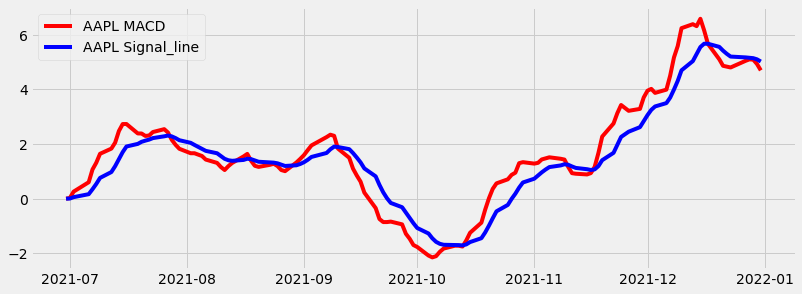

In [44]:
stock="AAPL"
df=calculate_MACD(stock)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index,df["MACD"],label=stock+" MACD",color="red")
plt.plot(df.index,df["Signal_line"],label=stock+" Signal_line",color="blue")
plt.legend(loc="upper left")
plt.show()

In [45]:
df["AAPL"]

Date
2021-06-30    136.960007
2021-07-01    137.270004
2021-07-02    139.960007
2021-07-06    142.020004
2021-07-07    144.570007
                 ...    
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
2021-12-31    177.570007
Name: AAPL, Length: 129, dtype: float64

In [46]:
def buy_sell(signal):
    Buy=[]
    Sell=[]
    flag= -1 
    
    
    for i in range(0,len(signal)):
        if signal["MACD"][i] > signal["Signal_line"][i]:
            Sell.append(np.nan)
            if flag != 1 :
                Buy.append(signal[stock][i])
                flag=1 
            else:
                Buy.append(np.nan)
        
        elif signal["MACD"][i] < signal["Signal_line"][i]:
            Buy.append(np.nan)
            if flag != 0 :
                Sell.append(signal[stock][i])
                flag= 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy,Sell)

In [47]:
a=buy_sell(df)
df['Buy_Signal_Price']=a[0]
df["Sell_Signal_Price"]=a[1]
df

,AAPL,long_term_EMA,short_term_EMA,MACD,Signal_line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,
2021-06-30,136.960007,136.960007,136.960007,0.000000,0.000000,NaN,NaN
2021-07-01,137.270004,136.982969,137.007699,0.024729,0.004946,137.270004,NaN
2021-07-02,139.960007,137.203491,137.461900,0.258409,0.055638,NaN,NaN
2021-07-06,142.020004,137.560270,138.163147,0.602877,0.165086,NaN,NaN
2021-07-07,144.570007,138.079509,139.148818,1.069308,0.345931,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-27,180.330002,168.900592,173.951370,5.050778,5.173864,NaN,NaN
2021-12-28,179.289993,169.670178,174.772697,5.102519,5.159595,NaN,NaN
2021-12-29,179.380005,170.389424,175.481514,5.092090,5.146094,NaN,NaN


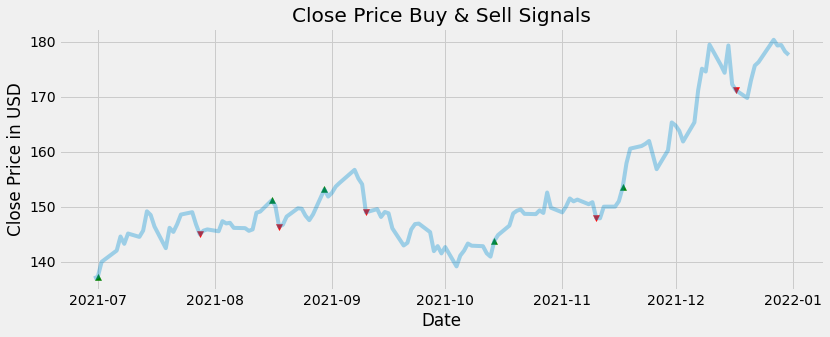

In [48]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index,df["Buy_Signal_Price"],color="green",label="Buy",marker="^",alpha=1)
plt.scatter(df.index,df["Sell_Signal_Price"],color="red",label="Sell",marker="v",alpha=1)
plt.plot(df[stock],label="Close Price",alpha=0.35)
plt.title("Close Price Buy & Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price in USD")
plt.show()

<h1>Monte Carlo<h1>
    

In [49]:
# Get daily return 
close_data.head()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,59.599998,8.77,347.709991,109.830002,200.024994,136.960007,270.899994,15.12
2021-07-01,58.020000,8.49,354.390015,105.839996,202.119995,137.270004,271.600006,14.89
2021-07-02,56.470001,8.46,354.700012,106.089996,204.869995,139.960007,277.649994,15.00
2021-07-06,56.860001,8.22,352.779999,106.650002,206.985001,142.020004,277.660004,15.01
2021-07-07,54.369999,8.23,350.489990,104.489998,203.717499,144.570007,279.929993,14.89


In [51]:
# Find Log return
log_ret = np.log(close_data/close_data.shift(1))
log_ret.head()

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Date,,,,,,,,
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-01,-0.026868,-0.032448,0.019029,-0.037005,0.010419,0.002261,0.002581,-0.015328
2021-07-02,-0.027078,-0.003540,0.000874,0.002359,0.013514,0.019407,0.022031,0.007360
2021-07-06,0.006883,-0.028779,-0.005428,0.005265,0.010271,0.014611,0.000036,0.000666
2021-07-07,-0.044780,0.001216,-0.006512,-0.020461,-0.015912,0.017796,0.008142,-0.008027


In [52]:
#calculate the log return mean of each stock
log_ret.mean() * 252

Symbols
FSLY   -1.022829
IMMR   -0.844826
FB     -0.065395
U       0.519437
NVDA    0.758976
AAPL    0.511237
MSFT    0.425867
METV    0.007797
dtype: float64

In [53]:
# Compute pairwise covariance of columns
log_ret.cov()*252

Symbols,FSLY,IMMR,FB,U,NVDA,AAPL,MSFT,METV
Symbols,,,,,,,,
FSLY,0.363880,0.113984,0.055545,0.174212,0.080145,0.020375,0.019675,0.082169
IMMR,0.113984,0.449022,0.026607,0.076610,0.018752,0.023740,0.015509,0.052776
FB,0.055545,0.026607,0.081570,0.056206,0.045517,0.023931,0.025187,0.037423
U,0.174212,0.076610,0.056206,0.310924,0.117850,0.029973,0.033563,0.086359
NVDA,0.080145,0.018752,0.045517,0.117850,0.212329,0.043695,0.050072,0.073073
AAPL,0.020375,0.023740,0.023931,0.029973,0.043695,0.049926,0.027959,0.025658
MSFT,0.019675,0.015509,0.025187,0.033563,0.050072,0.027959,0.039288,0.026114
METV,0.082169,0.052776,0.037423,0.086359,0.073073,0.025658,0.026114,0.050937


In [54]:
# Let's start with a random allocation 

In [59]:
# np.random.seed(101)

# Create close proce for stock
print('Stock Price')
print(close_data.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(8))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stock Price
Index(['FSLY', 'IMMR', 'FB', 'U', 'NVDA', 'AAPL', 'MSFT', 'METV'], dtype='object', name='Symbols')


Creating Random Weights
[0.72154386 0.18993895 0.55422759 0.35213195 0.1818924  0.78560176
 0.96548322 0.23235366]


Rebalance to sum to 1.0
[0.18114799 0.04768533 0.13914222 0.08840488 0.0456652  0.19723012
 0.24239046 0.05833381]


Expected Portfolio Return
0.05042337071266899


Expected Volatility
0.23834007328901727


Sharpe Ratio
0.21156060756734063


In [60]:
# Let's start our monte carlo generation

In [64]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(close_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(8))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [65]:
# Get the maximum value of sharpe ratio obtained from all the runs
sharpe_arr.max()

2.041489234755087

In [71]:
# Find the index location of the max sharpe value generated
sharpe_arr.argmax()

14606

In [76]:
# Get the repesctive proportion of weights for the stocks for max profit
all_weights[14606,:]

array([0.00659632, 0.0177574 , 0.00195676, 0.09898264, 0.32744825,
       0.29320048, 0.23466309, 0.01939507])

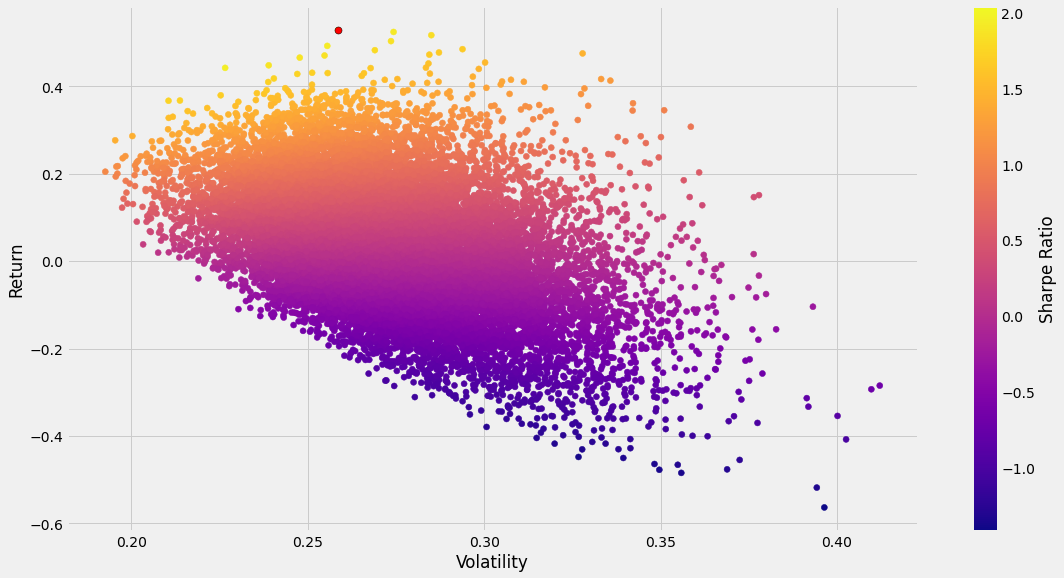

In [77]:
max_sr_ret = ret_arr[14606]
max_sr_vol = vol_arr[14606]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [79]:
def get_ret_vol_sr(weights):
    """
    Takes in weights and returns back an array of mean return, mean volatility and sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [80]:
from scipy.optimize import minimize
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [81]:
# Constraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [82]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1), (0, 1), (0, 1), (0, 1))

In [83]:
# Initial Guess (equal distribution)
init_guess = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
# Sequential Least Squares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
opt_results

     fun: -2.4978935262858855
     jac: array([ 6.78060997e+00,  5.52290106e+00,  1.98334160e+00,  3.61233950e-04,
        8.86023045e-05,  9.74237919e-05, -1.67399645e-04,  1.85843953e+00])
 message: 'Optimization terminated successfully'
    nfev: 83
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 5.37388498e-15, 1.08338116e-02,
       8.23113466e-02, 5.30931883e-01, 3.75922959e-01, 3.48011312e-15])

In [84]:
get_ret_vol_sr(opt_results.x)

array([0.49962503, 0.20001855, 2.49789353])

In [ ]:
# # Our returns go from 0 to somewhere along 0.2
# # Create a linspace number of points to calculate x on
# frontier_y = np.linspace(0,0.25,30000) 
# def minimize_volatility(weights):
#     return  get_ret_vol_sr(weights)[1]
# frontier_volatility = []
# for possible_return in frontier_y:
#     # function for return
#     cons = ({'type':'eq','fun': check_sum},
#             {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
#     result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
#     frontier_volatility.append(result['fun'])
# plt.figure(figsize=(17,9))
# plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
# plt.colorbar(label='Sharpe Ratio')
# plt.xlabel('Volatility')
# plt.ylabel('Return')
# # Add frontier line
# plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)